# Dropout

## 🎯 أولًا: المشكلة اللي Dropout بيحلها

لما الشبكات العصبية تكبر (deep networks)، بيحصل فيها مشكلة اسمها **Overfitting**:

> النموذج بيتعلم تفاصيل التدريب زيادة عن اللزوم لدرجة إنه يحفظها مش يفهمها.

يعني مثلاً:

* النموذج يتعلم noise أو patterns مش عامة.
* التدريب loss قليل جدًا ✅
  بس validation loss عالي جدًا ❌

دي مشكلة لأن الشبكة بتعتمد على **علاقات محددة جدًا بين neurons**،
يعني مثلاً neuron رقم 4 بيشتغل كويس بس لما neuron رقم 7 شغال، ولو اتلغى 7 الشبكة تنهار 😅

---

## 💡 ثانيًا: فكرة Dropout ببساطة

الفكرة عبقرية وسهلة جدًا:

> كل مرة الشبكة بتتدرب، بنختار **عشوائيًا** شوية Neurons ونطفيهم (نخليهم = 0) 🔥

يعني في كل batch، الشبكة بتتعلم بـ "نسخة مختلفة" من نفسها.

فـ بدل ما النموذج يعتمد على نيرون واحد بس في المعلومة،
هيضطر **يوزع المعرفة على أكتر من نيرون** ➜ وبالتالي يتعلم تمثيلات عامة أكتر.

---

## 🧮 ثالثًا: المعادلة البسيطة

خلينا نقول إن عندك layer نواتجها (outputs):

[
h = [h_1, h_2, h_3, h_4]
]

بنختار احتمال ( p = 0.5 ) إن أي neuron يتطفي.

فنولد mask:

[
mask = [1, 0, 1, 0]  \quad \text{(randomly)}
]

نطبقها كده:

[
h' = h * mask
]

يعني النتيجة تبقى:

[
h' = [h_1, 0, h_3, 0]
]

---

## ⚙️ رابعًا: أثناء التدريب vs الاختبار

* **في التدريب:** بنطفي neurons بشكل عشوائي حسب النسبة `p`.
* **في الاختبار (inference):**
  مش بنطفي حاجة، لكن بنعمل **scaling** عشان نحافظ على نفس القوة الكلية.

فـ لو كنا بنستخدم `p=0.5` في التدريب:
[
\text{output}*{test} = \text{output}*{train} \times (1 - p)
]
يعني نضرب في 0.5 أثناء الاختبار.

أو بالعكس — بعض المكتبات (زي PyTorch) بتعمل الـ scaling ده **أثناء التدريب** (inverted dropout).

---

## 🧠 خامسًا: intuition جميلة

تخيل فريق كرة قدم 🏟️
لو كل تمرين بيغيب عنه 3 لعيبة عشوائيين، الفريق هيضطر يوزّع المهارات.
كل واحد لازم يعرف يهاجم ويدافع شوية.
فـ لما كلهم يلعبوا سوا في المباراة (inference)، الأداء يبقى قوي جدًا ومتوازن.

ده بالضبط اللي بيحصل في Dropout.
الشبكة بتتعلم تكون “robust” مش “fragile”.

---

## 🧩 سادسًا: كود بسيط يوضحها

### في PyTorch:

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(100, 64)
        self.dropout = nn.Dropout(p=0.5)  # 50% dropout
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # يطفي neurons أثناء التدريب فقط
        x = self.fc2(x)
        return x

model = SimpleNN()
print(model)
```

* أثناء `model.train()` ➜ يطفي neurons عشوائيًا بنسبة 0.5
* أثناء `model.eval()` ➜ يوقف الـ dropout ويشتغل طبيعي

---

## 📊 سابعًا: تأثيره الفعلي

| الحالة                        | النتيجة                                                    |
| ----------------------------- | ---------------------------------------------------------- |
| بدون Dropout                  | Loss قليل جدًا في التدريب لكن validation سيئ (overfitting) |
| بـ Dropout                    | Loss التدريب أعلى، لكن validation أفضل                     |
| Dropout كبير جدًا (مثلاً 0.8) | الشبكة مش بتتعلم كويس (underfitting)                       |

---

## ⚠️ ثامنًا: اختيارات الـ p المناسبة

| نوع الشبكة             | نسبة Dropout مناسبة |
| ---------------------- | ------------------- |
| Fully Connected Layers | 0.3 – 0.5           |
| Convolutional Layers   | 0.2 – 0.3           |
| Recurrent (RNN/LSTM)   | 0.1 – 0.2           |

---

## 💬 تاسعًا: مزايا وعيوب

✅ **المميزات:**

* يقلل الـ overfitting.
* يخلي الشبكة تتعلم تمثيلات عامة (generalizable).
* بسيط وسهل الإضافة لأي model.

❌ **العيوب:**

* يبطئ عملية التعلم شويّة (لأنك بتطفي neurons).
* أحيانًا مش مناسب لو الشبكة صغيرة جدًا.
* مش مثالي لو بتستخدم BatchNorm في كل layer (بيعمل تداخل في التأثير).

---

## 🧩 عاشرًا: مشاريع بسيطة تجربها

1. جرّب نفس الـ model مرتين:

   * مرة بدون Dropout
   * مرة بـ Dropout(p=0.5)
     وشوف الفرق بين train_loss و val_loss

2. ارسم عدد الـ active neurons في كل batch
   هتلاحظها بتتغير عشوائيًا في كل epoch 🔁



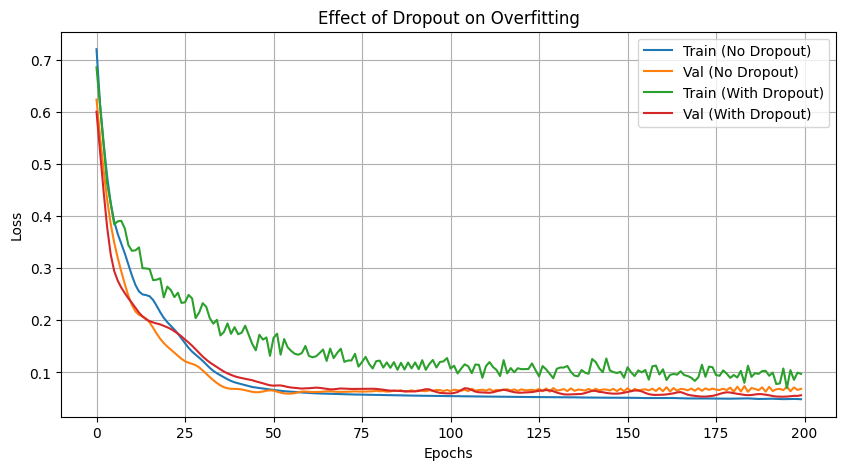

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# 1️⃣ إنشاء بيانات بسيطة (تصنيف ثنائي)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_val = torch.FloatTensor(X_val)
y_val = torch.LongTensor(y_val)

# 2️⃣ شبكتين: واحدة بدون Dropout وواحدة بـ Dropout
class SimpleNN(nn.Module):
    def __init__(self, dropout_rate=0.0):
        super(SimpleNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.net(x)

# إنشاء النموذجين
model_no_dropout = SimpleNN(dropout_rate=0.0)
model_with_dropout = SimpleNN(dropout_rate=0.5)

# 3️⃣ إعداد الـ loss والـ optimizer
criterion = nn.CrossEntropyLoss()
opt1 = optim.Adam(model_no_dropout.parameters(), lr=0.01)
opt2 = optim.Adam(model_with_dropout.parameters(), lr=0.01)

# 4️⃣ دالة تدريب بسيطة
def train(model, optimizer, epochs=200):
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            val_losses.append(val_loss.item())
    return train_losses, val_losses

# 5️⃣ تدريب النموذجين
train_loss1, val_loss1 = train(model_no_dropout, opt1)
train_loss2, val_loss2 = train(model_with_dropout, opt2)

# 6️⃣ الرسم 📊
plt.figure(figsize=(10,5))
plt.plot(train_loss1, label='Train (No Dropout)')
plt.plot(val_loss1, label='Val (No Dropout)')
plt.plot(train_loss2, label='Train (With Dropout)')
plt.plot(val_loss2, label='Val (With Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Effect of Dropout on Overfitting')
plt.legend()
plt.grid(True)
plt.show()


# L1 , L2 regularization


المقارنة دي بتتكلم عن **L1 (Lasso)** و **L2 (Ridge)** regularization — الاتنين بيستخدموا علشان يقللوا الـ overfitting، بس كل واحد ليه طبيعته وشخصيته 😄
خلينا نفصّلهم واحدة واحدة بنفس الـ 6 فئات اللي المقال بيتكلم عنها 👇

---

### 🧩 1. أيهما أكثر **Robust** (ثباتًا أمام التغيرات والـ outliers)؟

➡ **الإجابة: L1**

لما يبقى في داتا فيها **outliers** (قيم شاذة جدًا)،
الـ **L2** بيعمل مربع للوزن → يعني لو فيه قيمة كبيرة، تأثيرها بيكبر أوي جدًا (exponentially).
بينما **L1** بياخد القيمة المطلقة → يعني الزيادة في العقوبة بتكون **خطية** مش مربعة.

🔹 النتيجة:
L1 بيتعامل مع الـ outliers بلُطف أكتر،
مش بيخلي نقطة واحدة غريبة تأثر جامد على الموديل.
عشان كده بنقول عليه **أكثر Robust**.

---

### 🔀 2. أيهما عنده **احتمالات حلول أكتر (More possibilities)**؟

➡ **الإجابة: L1**

* **L1** بيعتمد على *Manhattan distance* (زي إنك تمشي في شوارع مربعة زي نيويورك 😂).
  يعني فيه كذا طريق ممكن توصل بيه لنفس النقطة.
* **L2** بيعتمد على *Euclidean distance* (أقصر خط مستقيم بين نقطتين)،
  فمفيش غير طريق واحد مثالي.

🔹 النتيجة:
L1 عنده احتمالات أكتر للوصول لنفس الحل، وده يخليه أكثر مرونة.

---

### ⚙️ 3. أيهما **أقل تكلفة حسابية (Computationally expensive)**؟

➡ **الإجابة: L2**

السبب بسيط:

* L2 بيعتمد على مربعات الأوزان → فالمعادلة ليها **حل مغلق (Closed Form Solution)**.
  يعني ممكن نحلها رياضيًا بسهولة باستخدام المصفوفات.
* L1 بيعتمد على القيم المطلقة → ودي **مش قابلة للاشتقاق في الصفر (Non-differentiable)**.
  فمفيش طريقة مباشرة للحل، لازم نستخدم **خوارزميات iterative** (زي Gradient Descent).

🔹 النتيجة:
L2 أسرع وأسهل حسابيًا.

---

### 🌱 4. أيهما **بيعمل مخرجات Sparse (فيها أوزان = 0)**؟

➡ **الإجابة: L1**

زي ما قلنا قبل كده،

* L1 **يخلي بعض الأوزان = 0** → يعني كأنه حذف الـ feature دي.
  وبالتالي بيعمل **Feature Selection** تلقائي.
* L2 بيقلل الأوزان بس مش بيخليها صفر → يعني بيخليها “صغيرة جدًا” بس لسه موجودة.

🔹 النتيجة:
لو عايز موديل بسيط يستخدم أهم features بس → روح مع **L1**.
لو عايز كل features تفضل موجودة بس بتأثير ضعيف → استخدم **L2**.

---

### 🧮 5. أيهما **أفضل في الحالات متعددة المتغيرات correlated features**؟

➡ **الإجابة: L2**

لو عندك features كتير شبه بعض (correlated)،
L1 ممكن يحذف واحدة منهم عشوائيًا ويخلي التانية.
لكن L2 بيقلل وزنهم هما الاتنين شوية،
فبيتعامل معاهم بلُطف أكتر.

🔹 النتيجة:
لو داتك فيها ارتباطات عالية → **L2** أحسن.

---

### 🧠 6. أيهما **أسهل في التفسير**؟

➡ **الإجابة: L1**

لأن L1 بيخلي بعض الأوزان = 0،
فبتعرف بسهولة أي features فعلاً مهمة في التنبؤ.
إنما L2 بيقلل الكل شوية، فالتفسير بيكون أصعب.

---

### 💡 خلاصة المقارنة في جدول صغير:

| الفئة                           | الأفضل |
| ------------------------------- | ------ |
| Robustness (ثبات أمام التغيرات) | ✅ L1   |
| عدد الحلول الممكنة              | ✅ L1   |
| تكلفة حسابية                    | ✅ L2   |
| المخرجات Sparse                 | ✅ L1   |
| التعامل مع correlated features  | ✅ L2   |
| سهولة التفسير                   | ✅ L1   |

---

✨ **الخلاصة =:**

* لو عايز **موديل بسيط، بيفهم أهم features، ومش بيتأثر بـ outliers** → استخدم **L1**
* لو عايز **موديل مستقر وسريع، وكل الـ features تفضل موجودة** → استخدم **L2**



#Early Stopping

### 🎯 أولًا: الفكرة العامة

لما بتدرب موديل (زي Neural Network مثلًا)،
الموديل بيحاول يقلل الخطأ (loss) خطوة بخطوة.

كل Epoch بيتعلم أكتر من الداتا،
لكن لو سيبته يتعلم **كتير أوي**، هيبدأ **يحفظ الداتا** بدل ما يفهمها — وده اسمه **Overfitting** 😅

---

### 🧠 هنا بييجي دور Early Stopping

هو ببساطة **طريقة ذكية توقف التدريب في الوقت المثالي** 💡
يعني قبل ما الموديل يبدأ يحفظ الداتا ويتعب نفسه.

---

### ⚙️ إزاي بيشتغل؟

بنقسم البيانات لـ 2:

* **Training set** → اللي الموديل بيتعلم منها.
* **Validation set** → اللي بنستخدمها نراقب بيها أداء الموديل.

وبعدين نتابع:

* الـ **Training Loss** → المفروض يقل مع الوقت.
* الـ **Validation Loss** → المفروض يقل في الأول، بس بعد نقطة معينة هيبدأ **يزيد** لما الموديل يبدأ يحفظ.

📉 لما نلاحظ إن **Validation Loss بدأ يزيد** بعد ما كان بيقل،
يبقى الموديل بدأ يعمل **Overfitting**.
وهنا بنقول له:

> “خلاص كفاية كده يا نجم، وقف تدريب 👋”

وده هو **Early Stopping**.

---

### 📊 مثال عملي بسيط:

| Epoch | Training Loss | Validation Loss  |
| ----- | ------------- | ---------------- |
| 1     | 0.8           | 0.9              |
| 2     | 0.6           | 0.7              |
| 3     | 0.4           | 0.55             |
| 4     | 0.3           | 0.53             |
| 5     | 0.25          | 0.52             |
| 6     | 0.2           | 0.55 ⬆️ بدأ يزيد |

عند الـ Epoch 6 بدأ **Validation Loss يزيد**،
يبقى نوقف التدريب عند Epoch 5 — لأن ده أفضل أداء للموديل 💪

---

### 💡 الخلاصة :

> **Early Stopping = نعرف إمتى نقول للموديل كفاية تدريب علشان يفضل ذكي وميفضلش يحفظ.**


# Data Augmentation

### 🎯 الفكرة الأساسية

تخيل إن عندك مجموعة صور صغيرة جدًا،
والموديل بيتعلم منها — بس لأن عددها قليل،
الموديل **بيحفظها** ومش بيتعلم منها كويس 😔
وده بيؤدي إلى **Overfitting**.

فهنا بنقول للموديل:

> “ما تقلقش، هزوّدلك الداتا بشكل ذكي من غير ما أجيب صور جديدة.” 😎

وده هو بالظبط **Data Augmentation** —
إننا نخلق **نسخ مختلفة من نفس البيانات** عن طريق **تعديلات بسيطة** تخليها “كأنها جديدة”.

---

### 🖼️ مثال في الصور

لو عندك صورة قطة مثلاً 🐱،
ممكن نعمل منها نسخ جديدة بالشكل ده:

* نلفها شوية → (Rotation)
* نقلبها يمين أو شمال → (Flip)
* نقص جزء منها → (Crop)
* نغير الإضاءة أو اللون → (Brightness / Contrast)
* نعمل تكبير أو تصغير → (Zoom)
* نضيف Noise بسيط

كل نسخة بتبقى مختلفة كفاية تخلي الموديل يتعلم **بشكل أعمق وأذكى**.

---

### 🧠 الفكرة العلمية

الهدف هو إن الموديل **يشوف نفس الكلاس بأشكال مختلفة**،
فميتعلمش يحفظ شكل الصورة،
لكن يفهم **السمات المميزة فعلاً** (features) اللي بتحدد الفئة.

يعني بدل ما يتعلم إن “القطة” لازم تكون في نص الصورة،
هيتعلم إن القطة = “أذن مدببة + عينين بشكل معين + فراء” حتى لو الصورة مقلوبة أو مظلمة.

---

### ⚙️ مثال عملي (في Keras / TensorFlow)

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,       # لف الصورة لحد 30 درجة
    width_shift_range=0.2,   # تحريك أفقي بسيط
    height_shift_range=0.2,  # تحريك رأسي بسيط
    shear_range=0.2,         # ميل الصورة
    zoom_range=0.2,          # تكبير/تصغير
    horizontal_flip=True,    # قلب أفقي
    fill_mode='nearest'      # طريقة ملء البكسلات الفاضية
)

# بنطبق التعديلات على الصور أثناء التدريب
datagen.fit(X_train)
```

الموديل كده كل Epoch بيشوف صور مختلفة شوية،
وده بيخليه أذكى وأقل عرضة للـ overfitting 💪

---

### 📊 مش بس في الصور!

Data Augmentation ممكن نستخدمه في مجالات تانية:

* 🗣️ **NLP (النصوص):** نبدّل كلمات بمرادفات، أو نضيف ضوضاء بسيطة للكلمات.
* 🎧 **Audio:** نغير درجة الصوت أو السرعة أو نضيف Noise.
* 📈 **Time Series:** نضيف ضوضاء أو نغير الاتجاه قليلاً.

---

### 💡 الخلاصة :

> **Data Augmentation = نخلق بيانات جديدة من القديمة بطريقة ذكية علشان الموديل يتعلم بعمق وميفضلش يحفظ.**
